### Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/gopalk167/Sales-vs-Advertisement/main/Advertising.csv"))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Check total features and records:


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [4]:
df.shape

(200, 4)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Check Null values in dataset

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
columns = df.columns[:-1]
columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

## Check for Outliers:

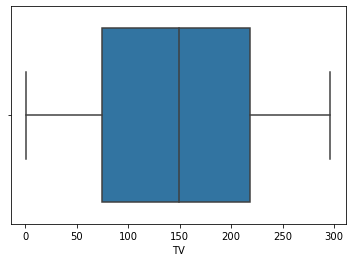

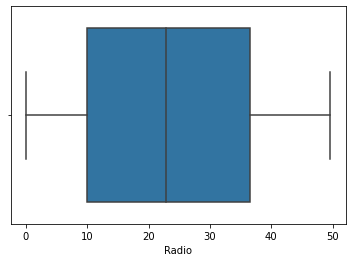

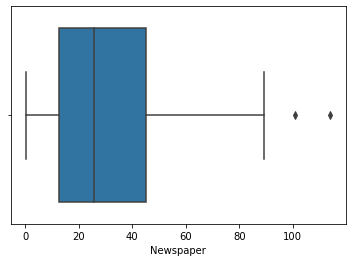

In [11]:
for col in columns:
    sns.boxplot(x=col,data=df)
    plt.show()

<AxesSubplot:xlabel='Sales'>

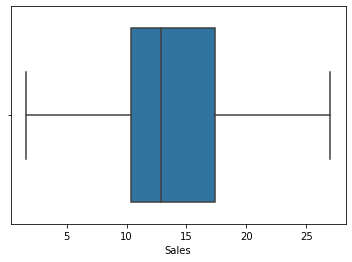

In [12]:
#checking for outliers in our dependent variable
sns.boxplot(df["Sales"])

## Check Correlation of each feature with Sales:

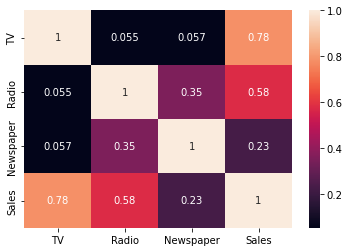

In [13]:
#visualize corr by heatmap 
sns.heatmap(df.corr(),annot=True)
plt.show()

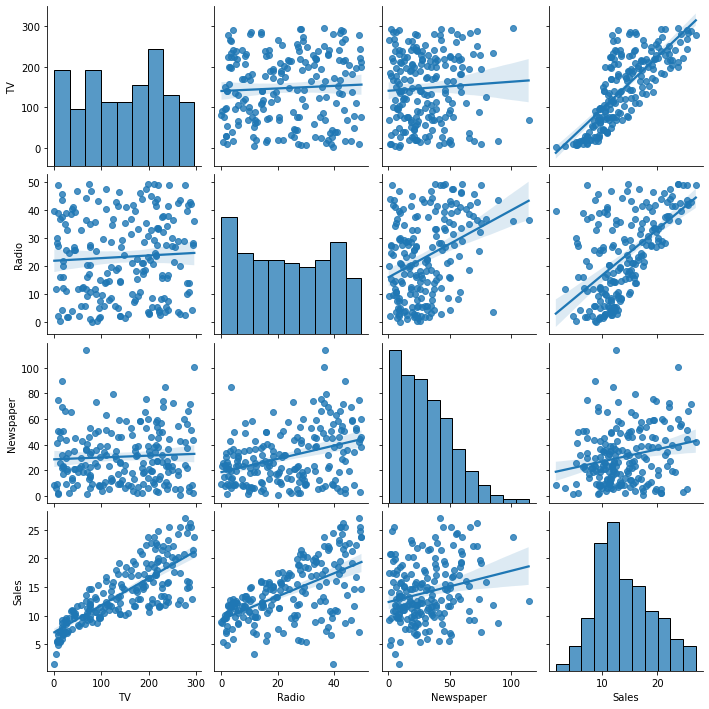

In [14]:
sns.pairplot(data=df, kind='reg')
plt.show()

## See Data Distribution of each feature:

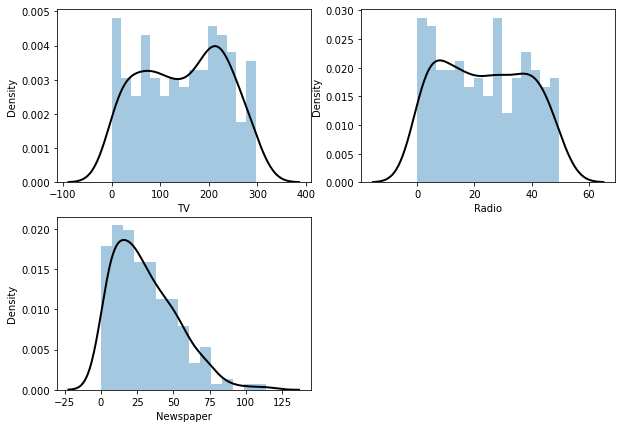

In [15]:
l = ['TV','Radio','Newspaper']
plt.figure(figsize=(10,7)) 
for i,v in enumerate(l):
    plt.subplot(2,2,i+1)
    sns.distplot(df[v],bins=15,kde_kws={'linewidth':2,'color':'black'})
plt.show()

In [16]:
# check skewness in all numeric column
columns=['TV','Radio','Newspaper']
for col in columns:
    s=df[col].skew().round(2)
    print('skewness of {} : {}'.format(col,s))

skewness of TV : -0.07
skewness of Radio : 0.09
skewness of Newspaper : 0.89


In [17]:
df.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


### Correlation 
* correlation values with TV and sales=0.78 , It is very good
* correlation values with radio and sales=0.58 , It is good(ok)
* correlation values with newspaper and sales=0.27 , It is very bad

* As newsapaper has very less corr with o/p sales --

## Train-Test split : 70/30 ratio

In [18]:
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.,random_state=1)

In [21]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [22]:
len(X_train)

140

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
Y_pred = lr.predict(X_test)

#### Evaluation of model - Model performance

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
# Mean Absolute error
print("MAE" , mean_absolute_error(Y_test,Y_pred))

MAE 1.0548328405073313


In [30]:
# Mean squared error
print("MSE", mean_squared_error(Y_test,Y_pred))

MSE 1.9289249074665722


In [31]:
#RMSE
print("RMSE" , np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 1.3888574107756966


# FITTING A DECISION TREE MODEL ON THE SAME DATASET 

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
max_depth = np.arange(1,10)
mae = []

for k in max_depth:
    dt = DecisionTreeRegressor(max_depth=k)
    dt.fit(X_train, Y_train)
    Y_predict = dt.predict(X_test)
    mae.append(np.mean(np.abs(Y_test - Y_predict)))

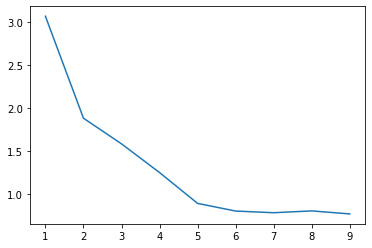

In [34]:
plt.plot(max_depth, np.array(mae))
plt.show()
#this shows MAE is min at k =7 so will take k as 7

In [35]:
dt = DecisionTreeRegressor(max_depth=7)

In [36]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7)

In [37]:
Y_predict =dt.predict(X_test)

#### Evaluation of model 

In [38]:
# Mean Absolute error
print("MAE" , mean_absolute_error(Y_test,Y_predict))

MAE 0.7804166666666668


In [39]:
# Mean squared error
print("MSE", mean_squared_error(Y_test,Y_predict))

MSE 1.2411863425925929


In [40]:
#RMSE
print("RMSE" , np.sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1.1140854287677373


## Fitting a knn regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
neighbour = np.arange(1,15)
mae = []

for k in neighbour:
    kr = KNeighborsRegressor(n_neighbors=k)
    kr.fit(X_train, Y_train)
    Y_predict = kr.predict(X_test)
    mae.append(np.mean(np.abs(Y_test - Y_predict)))

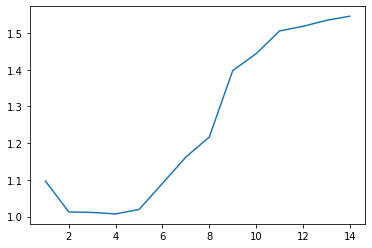

In [48]:
plt.plot(neighbour, np.array(mae))
plt.show()
#this shows MAE is min at k =3 so will take k as 3

In [49]:
kr = KNeighborsRegressor(n_neighbors=3)

In [50]:
kr.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
Y_predict= kr.predict(X_test)

#### Evaluation of model 

In [52]:
# Mean Absolute error
print("MAE" , mean_absolute_error(Y_test,Y_predict))

MAE 1.0111111111111113


In [53]:
# Mean squared error
print("MSE", mean_squared_error(Y_test,Y_predict))

MSE 1.6491111111111114


In [54]:
#RMSE
print("RMSE" , np.sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1.284177211723955


In [ ]:
# We can go with decision Tree Regressor or Linear regression both